<a href="https://colab.research.google.com/github/ZachPetroff/Babybot/blob/master/examples/Non_Contingent_Extinction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code can be used to add a folder in the repository to the Python import
# path, irrespective of whether the notebook is being run in colab or Jupyter.
# (C) 2020 Abe Leite, Indiana University Bloomington
# This code block is released under MIT license. Feel free to make use of
# this code in any projects so long as you reproduce this text.

import os
import sys
import subprocess

repo_URL = 'https://github.com/ZachPetroff/Babybot'
repo_name = repo_URL.split('/')[-1]
code_folder = ''

try:
  repo_path = subprocess.check_output('git rev-parse --show-toplevel', shell=True).decode().strip()
except subprocess.CalledProcessError:
  os.system(f'git clone {repo_URL} --depth 1')
  repo_path = os.path.abspath(repo_name)

code_path = os.path.join(repo_path, code_folder)
sys.path.append(code_path)
print(f'Loading code from {code_path}')

Loading code from /content/Babybot/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import main
import graph
import simulation

# Biological Reference (Sullivan & Lewis, 2003)
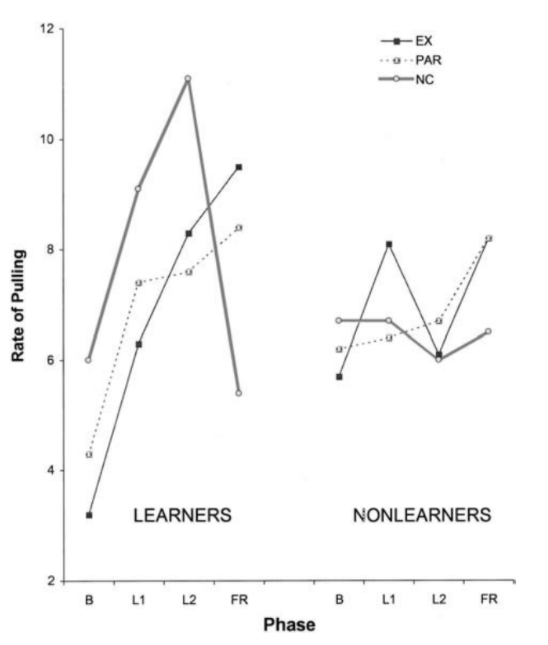

# Non-Contingent Extinction
In 2003, Sullivan and Lewis tested numerous types of extinction: full, partial, and non-contingent. Of the three types of extinction, the only one that did not result in an extinction burst was the non-contingent extinction (shown above). For the extinction period to be "non-contingent" means the reward is still presented during the disconnect phase, however, the connected limb is no longer causing the reward. This notebook tests whether the two extinction-burst producing models match the biological data under this condition. 

## Mobile Dynamics

In [ ]:
reward = 6e-2 #@param
cost = 3e-2 #@param
mobile_window = .025 #@param
nc_rate = 1 #@param

# simulate, while extracting key values
output = simulation.simulate(rates=[20, 20, 20, 20], reward=reward, cost=cost, mobile_on=True, non_contigent=True, nc_rate=nc_rate)

# list of extracted information
simulation.display_output(output)

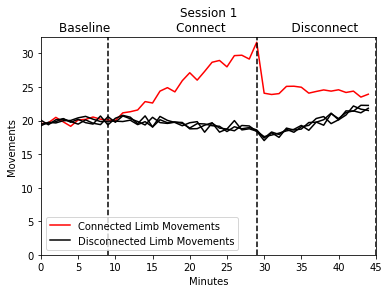

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

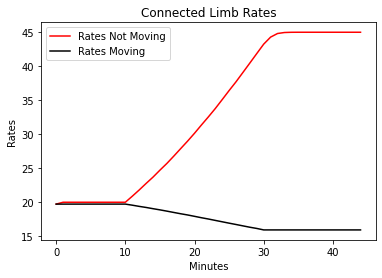

In [ ]:
graph.plot_rates(output["minutes"], output["still mobile rates"], output["moving mobile rates"])

## Violation of Expectation

In [ ]:
reward = .07 #@param
cost = .025 #@param
exp_growth = 2e-4 #@param
exp_decay = 5e-4 #@param
nc_rate = 1 #@param

output = simulation.simulate(rates=[20, 20, 20, 20], reward=reward, cost=cost, expectation_growth=exp_growth, 
                             expectation_decay=exp_decay, non_contigent=True, nc_rate=nc_rate)

# list of accessible values
simulation.display_output(output)

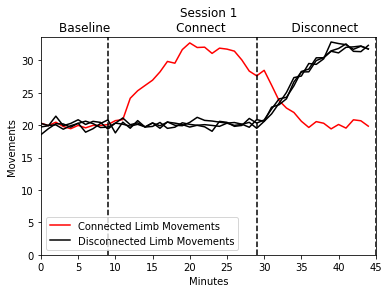

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

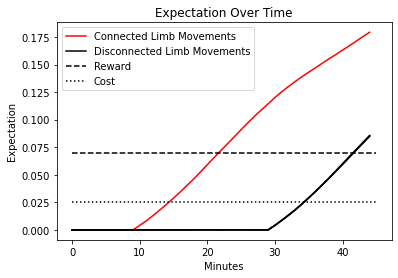

In [ ]:
graph.plot_expectation(output["minutes"], reward, cost, output["right arm expectations"], output["left arm expectations"], output["right leg expectations"], output["left leg expectations"], 0)

# Discussion
Neither model produces an extinction burst under the non-contingent disconnect phase, thus, they match the biological data. However, the disconnected limb movements increase. While the disconnected limb movements were not discussed in the Sullivan and Lewis paper, one would assume that they do not increase. 